# Equipo 1 

## Grupo: 001 (Lunes 7:00 - 10:00 pm)

### Integrantes:

+ 1848655 - Rangel Vallejo Isabel Alejandra
+ 1851167 - Aguilar Sánchez José Antonio
+ 1851124 - Cerecero Peña Angela Scarlett
+ 1851528 - Romero Banda José Manuel
+ 1853849 - García Gutiérrez Alfonso de Jesús

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Empezaremos por leer la base de datos que trabajaremos

In [2]:
baseCO2 = pd.read_csv('CO2.csv')
base_nueva = baseCO2.rename(columns = {'Vehicle Class':'Vehicle_Class','Engine Size(L)':'Engine_Size(L)',
                                       'Fuel Type':'Fuel_Type','Fuel Consumption City (L/100 km)':'Fuel_Consumption_City(L/100 km)',
                                       'Fuel Consumption Hwy (L/100 km)':'Fuel_Consumption_Hwy(L/100 km)',
                                       'Fuel Consumption Comb(g/km)':'Fuel_Consumption_Comb(g/km)',
                                       'Fuel Consumption Comb (mpg)':'Fuel_Consumption_Comb(mpg)',
                                       'CO2 Emissions(g/km)':'CO2_Emissions(g/km)'})
for i in range(0,7385):     # Gracias a que ya sabemos el tamaño de la base de datos
    if base_nueva['Transmission'][i][0]=='A':
        base_nueva['Transmission'][i]='Automatic'
    else:
        if base_nueva['Transmission'][i][0]=='M':
            base_nueva['Transmission'][i]='Manual'
base_nueva

<ipython-input-2-84cf140cfe2a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_nueva['Transmission'][i]='Automatic'
<ipython-input-2-84cf140cfe2a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_nueva['Transmission'][i]='Manual'


,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel Consumption Comb (L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Automatic,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232


## Deteccion de outliers

#### ¿Que son los outliers?  

Es una observación anormal en una muestra estadística o serie temporal que afecta la estimación de parámetros.  
  
Identificar “outliers” es fundamental si se desea realizar un análisis descriptivo, ya que estos forman parte de la estadística descriptiva.   

Los valores extremos se denominan “outliers” en inglés    
Los valores internos se denominan “insiders” en inglés.
  
#### Significado de los outliers
  
Tener este tipo de valores pueden significar:  
1. ERROR: Errores a la hora de capturar datos  
2. CASOS EXTREMOS: Momentos o casos fuera de lo esperado, casos anómalos


### Identificando outliers  

Para esto, se pondrá en discusion la presencia de outliers en los valores de nuestra variable **CO2_Emissions(g/km)**  
Podemos identificar la presencia de este tipo de datos mediante un diagrama de caja o boxplot:

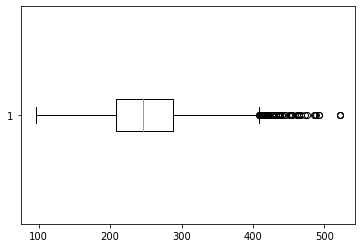

In [ ]:
plt.boxplot(base_nueva['CO2_Emissions(g/km)'], vert=False)
plt.show()

De la gráfica anterior, es posible detectar la presencia de estos datos. Para esto nos basta con recordar que nos grafica un diagrama de caja:  
Se sabe que los lados externos del diagrama boxplot representan tanto el valor mínimo como el valor máximo, por lo que los valores que estén fuera del mínimo y máximo, son considerados **outliers**

Con lo observado anteriormente, se conluye que hay una presencia de **outliers**. Se procederá a realizar una busqueda de dichos datos

In [3]:
BI=base_nueva['CO2_Emissions(g/km)'].quantile(.25)-1.5*(base_nueva['CO2_Emissions(g/km)'].quantile(.75)-base_nueva['CO2_Emissions(g/km)'].quantile(.25))
BS=base_nueva['CO2_Emissions(g/km)'].quantile(.75)+1.5*(base_nueva['CO2_Emissions(g/km)'].quantile(.75)-base_nueva['CO2_Emissions(g/km)'].quantile(.25))
ubicacion_outliers=(base_nueva['CO2_Emissions(g/km)']<BI)|(base_nueva['CO2_Emissions(g/km)']>BS)
print('Ubicación de outliers\n',ubicacion_outliers)

Ubicación de outliers
 0       False
1       False
2       False
3       False
4       False
        ...  
7380    False
7381    False
7382    False
7383    False
7384    False
Name: CO2_Emissions(g/km), Length: 7385, dtype: bool


Ahora, se realiza una visualización de los datos que son considerados outliers, en este caso se filtra de la base de datos original aquellos que cumplan dicha condición:

In [4]:
outliers=base_nueva[ubicacion_outliers]
outliers

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel Consumption Comb (L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
48,AUDI,R8,TWO-SEATER,5.2,10,Manual,Z,21.1,13.8,17.8,16,409
52,AUDI,R8 SPYDER,TWO-SEATER,5.2,10,Manual,Z,21.1,13.8,17.8,16,409
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,Automatic,Z,22.3,14.9,19.0,15,437
223,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,4.8,8,Automatic,X,21.1,14.2,18.0,16,414
224,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,Automatic,X,21.9,15.0,18.8,15,432
...,...,...,...,...,...,...,...,...,...,...,...,...
6046,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,Automatic,Z,26.6,15.8,21.7,13,493
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,Automatic,Z,26.8,16.6,22.2,13,522
7019,JEEP,Grand Cherokee 4X4 Trackhawk,SUV - STANDARD,6.2,8,Automatic,Z,20.9,13.8,17.7,16,413
7058,LAMBORGHINI,Aventador Coupe,TWO-SEATER,6.5,12,Automatic,Z,26.2,15.5,21.4,13,485


Continuando, se visualiza la otra parte de nuestra base, es decir, aquellos datos que no son considerados outliers:

In [5]:
ubicacion_sin_outliers=(base_nueva['CO2_Emissions(g/km)']>=BI)&(base_nueva['CO2_Emissions(g/km)']<=BS)
sin_outliers=base_nueva[ubicacion_sin_outliers]
sin_outliers

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel Consumption Comb (L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Automatic,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232


Dado el filtro anterior, se prosigue a realizar nuevamente un chequeo para verificar que dichos datos ya se hayan eliminado:

{'whiskers': [<matplotlib.lines.Line2D at 0x185972ac220>,
 'caps': [<matplotlib.lines.Line2D at 0x185972ac8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18597298e80>],
 'medians': [<matplotlib.lines.Line2D at 0x185972acfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x185972ba340>],
 'means': []}

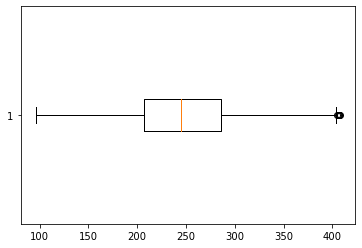

In [6]:
plt.boxplot(sin_outliers['CO2_Emissions(g/km)'],vert=False)

De lo anterior, se nota que aún se tiene la presencia de dichos datos, por lo que se procede a realizar nuevamente una eliminación de estos datos repitiendo los datos hechos anteriormente.

Visualizando la ubicación de los datos outliers:

In [7]:
BI=sin_outliers['CO2_Emissions(g/km)'].quantile(.25)-1.5*(sin_outliers['CO2_Emissions(g/km)'].quantile(.75)-sin_outliers['CO2_Emissions(g/km)'].quantile(.25))
BS=sin_outliers['CO2_Emissions(g/km)'].quantile(.75)+1.5*(sin_outliers['CO2_Emissions(g/km)'].quantile(.75)-sin_outliers['CO2_Emissions(g/km)'].quantile(.25))
ubicacion_outliers2=(sin_outliers['CO2_Emissions(g/km)']<BI)|(sin_outliers['CO2_Emissions(g/km)']>BS)
print('Ubicación de outliers\n',ubicacion_outliers2)

Ubicación de outliers
 0       False
1       False
2       False
3       False
4       False
        ...  
7380    False
7381    False
7382    False
7383    False
7384    False
Name: CO2_Emissions(g/km), Length: 7305, dtype: bool


Continuando, se observa aquellos datos que no son considerados outliers en nuestra base:

In [8]:
ubicacion_sin_outliers2=(sin_outliers['CO2_Emissions(g/km)']>=BI)&(sin_outliers['CO2_Emissions(g/km)']<=BS)
sin_outliers2=sin_outliers[ubicacion_sin_outliers2]
sin_outliers2

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel Consumption Comb (L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Automatic,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232


Se verifica nuevamente que se hayan eliminado los datos outliers por completo:

{'whiskers': [<matplotlib.lines.Line2D at 0x185973c09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x185973cf0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x185973c0670>],
 'medians': [<matplotlib.lines.Line2D at 0x185973cf790>],
 'fliers': [<matplotlib.lines.Line2D at 0x185973cfaf0>],
 'means': []}

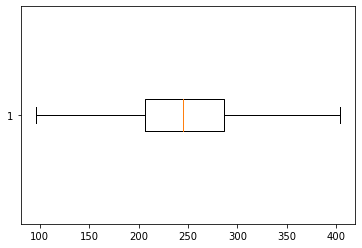

In [9]:
plt.boxplot(sin_outliers2['CO2_Emissions(g/km)'],vert=False)

Tomando en cuenta que se elimino la presencia outliers encontrados, se obtiene una base lista para poder trabajarla:

In [10]:
base_CO2=sin_outliers2
base_CO2

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel Consumption Comb (L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Automatic,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232


# Técnica de minería: Regresión lineal

La técnica que se decidió emplear en el trabajo para contestar o resolver el objetivo principal es la regresión lineal. Como ya se sabe, el objetivo de la regresión lineal es predecir el valor de una variable por medio del valor de otra(s). En el objetivo principal se dice que se quiere predecir las emisiones de CO2, por lo que se puede hacer uso de la regresión lineal para cumplir con esto. La regresión lineal involucra dos tipos de variables: dependiente e independiente; la variable que se quiere predecir es la dependiente, en nuestro caso el valor de las emisiones de CO2, mientras que las variables independientes son aquellas que se utilizarán para explicar el comportamiento de la variable dependiente, en la base se cuenta con distintas variables para hacer uso de ellas y modelar la regresión. En resumen, se hace uso de esta técnica debido a que será de utilidad para predecir las emisiones de CO2 y se cuenta con todas las componentes necesarias para realizarla.

Otro punto válido para trabajar con una regresión lineal es que se tienen suficientes variables independientes para intentar diversos modelos que las involucren. Las variables se relacionan de buena manera con la variable dependiente (emisiones de CO2), lo que nos indica que las emisiones podrían ser explicadas con alguna(s) de estas variables por medio de un modelo de regresión lineal múltiple (la relación se mostró en el avance 2 del PIA).

## Regresión lineal múltiple en Python  
*Es importante mencionar que la siguiente información (código) fue obtenida de una fuente externa, la cual estará anexada al final de documento con sus respectivas referencias.*

Antes de empezar a trabajar con la regresión lineal debemos preguntarnos "¿Por qué funcionaría una regresión con mis datos?". De antemano sabemos que las variables de la base están fuertemente relacionadas, lo que nos indica que una variable o un conjunto de variables podrían explicar de una buena manera el comportamiento de las emisiones de CO2 de los automóviles e intentar predecirlas por medio de un modelo de regresión lineal que usualmente son aplicados en estos casos.

De la misma manera, se puede suponer que las variables independientes están involucradas de manera directa con las emisiones. Por ejemplo, a mayor número de cilindros en un automóvil sabemos que implica que necesita más combustible (producirá más emisiones); a mayor tamaño de motor se necesita de igual forma mayor combustible (puesto que está medido en litros); entre otros casos. Por lo que podemos imaginar que un conjunto de variables de este estilo pueden predecir las emisiones de CO2 que un vehículo generará dadas sus características básicas.  

Una vez establecido esto, podemos empezar con el análisis de regresión lineal múltiple que proponemos.

### Librerías

Lo primero es llamar y nombrar a las librerías que se utilizarán a lo largo del trabajo, ya sea en la parte de análisis del modelo, revisión gráfica, entre otras.

In [11]:
# Para tratar los datos
import pandas as pd
import numpy as np

# Para elaborar las gráficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Para el proceso y modelado de la regresión
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

### Datos

Lo primero que se tiene que hacer es leer la base de datos más nueva que se tiene, en este caso es aquella que resulta después de las modificaciones y eliminaciones de columnas.

In [12]:
baseCO2 = base_CO2

Se debe comprobar que la base se haya guardado correctamente en la variable:

In [13]:
baseCO2

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel Consumption Comb (L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Automatic,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic,Z,11.2,8.3,9.9,29,232


De esta base, la variable dependiente será: CO2_Emissions(g/km); mientras que las posibles variables independientes serán: Engine_Size(L), Cylinders, Fuel_Consumption_City(L/100 km), Fuel_Consumption_Hwy(L/100 km) y Fuel Consumption Comb (L/100 km). Es importante recalcar que estas variables son numéricas. Como se estudió previamente, estas variables guardan una relación fuerte entre ellas por lo que nos serán de utilidad para ajustar un modelo de regresión lineal.

### Ajuste del modelo

En el objetivo principal se estableció que se quiere predecir las emisiones de CO2; esto se logra utilizando las diversas variables que se tienen en la base de datos. Sin embargo, una vez que se obtiene el modelo, ¿cómo comprobaríamos que predice correctamente?, esto es un problema puesto que necesitaríamos una serie de datos que contengan información para cada una de las variables involucradas en el modelo. Para no tener algún inconveniente con esto último, se suele separar la información original que en una proporción de 80-20, donde el 80% de los datos son designados para la elaboración del modelo y el 20% son dirigidos hacia la parte de intentar predecir dicho valor que se tiene. 

Una vez conociendo esto, se procede a separar la información original.

In [14]:
# División de los datos
X = baseCO2[['Engine_Size(L)', 'Cylinders', 'Fuel_Consumption_City(L/100 km)', 'Fuel_Consumption_Hwy(L/100 km)', 'Fuel Consumption Comb (L/100 km)']]
y = baseCO2['CO2_Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Donde las variables "train" nos ayudarán a elaborar el modelo y las variables "test" nos ayudarán a comprobar qué tanto ajusta nuestro modelo a valores reales que ya se contienen en la base.

Para la creación del modelo de regresión existen diversas alternativas en Python; sin embargo, se optó por trabajarlo por medio de matrices. A la matriz de los predictores se le tiene que añadir una columna de 1s para el intercepto del modelo. Las intrucciones quedan de la siguiente manera:

In [15]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     7752.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:22:05   Log-Likelihood:                -25765.
No. Observations:                5838   AIC:                         5.154e+04
Df Residuals:                    5832   BIC:                         5.158e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Por medio del summary obtenemos todos los datos pertinentes a una regresión lineal, como se ve a simple vista incluye valores que nos serán de suma importancia para analizar cada aspecto del modelo.

Lo primero que se debe mencionar es que este modelo está considerando todas las variables númericas anteriormente mencionadas, es decir, no se hizo una discriminación entre ellas ya que primero se quiere revisar cómo trabajan en conjunto.

Una vez aclarado esto, se debe revisar si el modelo es significativo, ya que si no lo es, no tendríamos porqué usarlo. Para probar esto, se realiza una prueba de hipótesis en la que la hipótesis nula es que la regresión no es significativa, mientras que la hipótesis alternativa es que la regresión es significativa. Al tener un p valor = 0.0, podemos decir que, con 95% de confianza, la regresión es signficativa en vista que p valor = 0.0 < alpha = 0.05. Por tanto, el modelo es significativo.

El modelo ha resultado significativo, el siguiente paso es revisar las características de dicho modelo, entre las que destacan:
+ **Ajuste del modelo:** El ajuste obtenido por este modelo es del 86.9%. El modelo explica el 86.9% de la variabilidad de los datos. En la práctica, se considera que 86.9% es un buen ajuste.
+ **Coeficientes de los modelos:** Es importante voltear a ver los coeficientes para cada variable regresora y la constante, puesto que estos son los que conformarán la ecuación para predecir a las emisiones de CO2.
+ **P valor para cada variable:** El p valor de las variables nos indica qué tanto contribuyen en significancia al modelo. Un p valor alto nos dice ausencia de significancia y un valor bajo, lo contrario.

Se puede notar que el p valor obtenido para las variables Fuel_Consumption_City(L/100 km), Fuel_Consumption_Hwy(L/100 km) y Fuel Consumption Comb (L/100 km) es muy grande (mayor a un alpha de 0.05). Esto nos dice que estas variables no contribuyen de manera significativa a nuestro modelo, por lo que podemos eliminarlas sin problema alguno. Nosotros dejaremos la última variable puesto que su p valor es el menor entre ellos tres y queremos comprobar si disminuye al eliminar las otras.

Se crea un nuevo modelo excluyendo las variables que no son significativas:

In [16]:
# Se eliminan las columnas del conjunto de train y test
X_train = X_train.drop(columns = 'Fuel_Consumption_City(L/100 km)')
X_train = X_train.drop(columns = 'Fuel_Consumption_Hwy(L/100 km)')
X_test  = X_test.drop(columns = 'Fuel_Consumption_City(L/100 km)')
X_test  = X_test.drop(columns = 'Fuel_Consumption_Hwy(L/100 km)')


X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.292e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:22:10   Log-Likelihood:                -25766.
No. Observations:                5838   AIC:                         5.154e+04
Df Residuals:                    5834   BIC:                         5.157e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Como se tiene un p valor = 0.0, el modelo sigue siendo significativo, lo cual es bueno; además, es importante recalcar que el ajuste obtenido por el modelo que excluye a las variables que no son significativas es el mismo que el del modelo anterior (86.9%), por lo que explica la misma variabilidad de los datos. Sin embargo, ahora podemos notar que el p valor obtenido para cada variable (0.0 en todos los casos) es menor a nuestro alpha de 0.05, por lo que podemos decir que las tres variables involucradas en el modelo contribuyen significativamente a este. 

Este modelo es mejor que el anterior aunque obtengamos el mismo ajuste. Esto se debe a que con una menor cantidad de variables podemos explicar la misma variabilidad. Además, también resulta más sencillo de interpretar y facilita el análisis.

### Intervalos de confianza para los coeficientes

Otra de los factores en el que debemos prestar atención es en los intervalos de confianza de los coeficientes para las variables. Estos intervalos nos revelan información valiosa. Si revisamos el intervalo del coeficiente constante, podremos saber si existe evidencia de regresión al origen, así como también se puede comprender entre qué valores estará comprendido dicho valor con cierta confianza.

In [17]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,52.519203,57.502463
Engine_Size(L),4.755525,7.021241
Cylinders,5.501222,7.077779
Fuel Consumption Comb (L/100 km),12.536129,13.176253


Con estos intervalos del 95% de confianza, podemos confirmar que no existe evidencia de regresión al origen puesto que el intervalo de la constante no involucra al cero; esto nos dice que no se creará otro modelo de regresión. Además, podemos estudiar entre qué valores oscilará el coeficiente de las demás variables.

### Residuales

Una de las últimas partes importantes a la hora de revisar un modelo es estudiar el comportamiento de los residuales. Como se estudió en clase, existen cuatro supuestos sobre estos que deben ser probados con el fin de determinar si el modelo tiene un grado mayor de significancia del que ya tiene. 

Antes de probar los supuestos, se deben calcular los residuales, los cuales salen al realizar la resta del valor estimado menos el valor real, el resultado será el residuo. Cada uno de los valores tiene un residuo, el objetivo es estudiar dichos residuos.

In [78]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

Una vez que se tienen los residuales, se comprobará que cumplan con los siguientes supuestos:
+ Media cero
+ Varianza constante
+ Normalidad
+ Incorrelación

Como no existe una prueba definida para probar la **media cero**, se suele calcular un promedio de los residuales y, si se encuentra cercano al cero, se acepta el cumplimiento del supuesto.

In [79]:
residuos_train.mean()

-1.7317379687374116e-13

Como se puede ver, el resultado obtenido es cercano a cero. Por lo tanto, se cumple el supuesto de media cero.

Para la prueba de **varianza constante** se intentará probar que la gráfica de dispersión no muestre un patrón aparente, ya que si se muestra un patrón, nos estaría diciendo que la varianza no es constante ya que tiende hacia algo. La gráfica a utilizar es el de las predicciones vs los residuales.

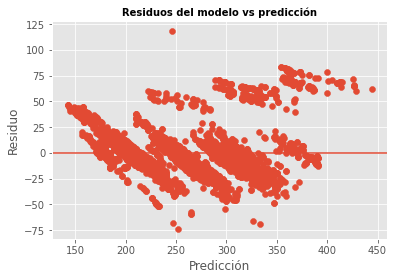

In [20]:
fig, ax = plt.subplots()
ax.scatter(prediccion_train, residuos_train)
plt.axhline(y=0)
ax.set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
ax.set_xlabel('Predicción')
ax.set_ylabel('Residuo')
plt.show()

El supuesto de varianza constante se puede "rescatar" a raíz de esta gráfica, puesto que no se identifica un patrón sumamente claro. Es verdad que la dispersión de los datos pareciera formar una serie de líneas que cruzan el cero, sin ambargo esto no parece una secuencia o algo por el estilo. Por lo que el supuesto de varianza constante se "rescata" para seguir probando los demás supuestos, así que se cumple.

Para probar la **normalidad** de los residuales basta con realizar una prueba de hipótesis donde decimos que H0 es que los residuales provienen de una distribución normal y H1 es que los residuales provienen de otra distribución. Para encontrar el p valor perteneciente, se utiliza la prueba conocida de shapiro test utilizada frecuentemente en estadística con el mismo fin. Haciendo esto, obtenemos lo siguiente:

In [21]:
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.8818002939224243, pvalue=0.0)

Al obtener un p valor = 0.0, se tiene que rechazar H0. Por lo tanto decimos que los residuales no siguen una distribución normal, por lo que no cumplen este supuesto.

No se necesita analizar la **incorrelación** de los residuales ya que sólo nos importa determinar si cumplen los cuatro supuestos a la vez o no. Como se comentó en un inicio, en caso de cumplirse los cuatro supuestos le daría un extra de importancia al modelo encontrado, pero para este modelo no se cumplen. 

Se sospecha que el problema con los supuestos se origina a raíz de la alta correlación entre variables que se encontró previamente. Al tener una fuerte correlación entre variables (no necesariamente con la dependiente) tenemos un problema con los VIF, ya que estos saldrán altos y eso no es lo que se busca. Sin embargo, al no poder cambiar el comportamiento de las variables y su relación, se tomará la parte positiva que es el ajuste del modelo del 86.9% que explica de buena manera la variabilidad de los datos.

#### Gráficas 3 en 1 de los supuestos realizados

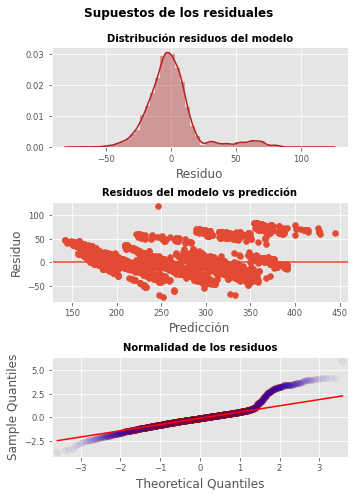

In [90]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(5, 7))
#### Media cero
sns.distplot(
    residuos_train,
    kde     = True,
    color   = "firebrick",
    ax      = axes[0]
)

axes[0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[0].set_xlabel("Residuo")
axes[0].tick_params(labelsize = 8.5)

#### Residuos del modelo vs predicción
axes[1].scatter(prediccion_train, residuos_train)
axes[1].axhline(y = 0)
axes[1].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Residuo')
axes[1].tick_params(labelsize = 8.5)

#### Normalidad
sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[2], 
    color = 'firebrick',
    alpha = 0.05,
    lw    = 2
)
axes[2].set_title('Normalidad de los residuos', fontsize = 10, fontweight = "bold")
axes[2].tick_params(labelsize = 8.5)

#### Poniendola guapa
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Supuestos de los residuales', fontsize = 12, fontweight = "bold");

### Predicciones del modelo

Como se estableció en un inicio, una parte importante de los modelos es el de predecir los valores para nuevos datos. En nuestro caso, deliberadamente, dejamos el 20% de los valores a un lado con el fin de utilizarlos como valores a predecir. Es decir, predecir estos valores que tenemos es el objetivo del modelo para medir qué tanto funcionarían aplicados en la realidad.

La siguiente serie de instrucciones nos permiten conocer los intervalos de confianza para cada predicción, así como el error cuadrático medio, entre otras cosas.

In [ ]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
4457,210.691276,0.604285,209.506653,211.875899,171.495317,249.887234
117,294.509349,0.503328,293.522640,295.496059,255.318873,333.699826
2512,261.792212,0.285176,261.233163,262.351262,222.610171,300.974254
5302,232.451037,0.464860,231.539739,233.362335,193.262387,271.639687


### Error del test

In [ ]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (RMSE) de test es: {rmse}")


El error (RMSE) de test es: 19.17383108376155


### Interpretación del modelo

La ecuación del modelo de regresión lineal múltiple que se obtuvo finalmente es:

$$Emisiones de CO2 (g/km) = 5.8884EngineSize(L) + 6.2895Cylinder + 12.8562FuelConsumptionComb(L/100 km) + 55.0108$$

Es capaz de explicar el 86.9% de la variabilidad de las emisiones de CO2(g/km) que los automóviles emiten. La prueba de significancia del modelo resultó aprobatoria, por tanto, el modelo de regresión es significativo. Además, podemos decir que el tamaño del motor, el número de cilindros del vehículo y el consumo combinado de combustible(L/100km) están relacionados con las emisiones de CO2 de un automóvil y contribuyen significativamente al modelo.

A pesar de todo esto, no se satisface la condición de normalidad en los residuales, por lo que los intervalos de confianza para los coeficientes y las predicciones no son tan fiables como se esperaría.

Finalmente, el error cuadrático medio del modelo es de 19.17., lo que nos indica que las predicciones del modelo final se alejan, en promedio, 19.17(g/km) del valor real.

## Métricas de evaluación

### Error cuadrático medio
Mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. Nos indica, en promedio, cuánto nos desvíamos del valor real. 

Esta métrica es de las más importantes puesto que resume todo el análisis de un modelo. Básicamente, no importa si tus residuos cumplen todos los supuestos o si tienes un ajuste superior al 90%, si tu error cuadrático medio es demasiado alto, entonces tus predicciones no serán muy acertadas, por ello lo que se busca en este estimador es tener el valor más pequeño posible porque nos diría que no existe mucha diferencia entre las predicciones y el valor real. Se calcula de la siguiente manera:

In [ ]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (RMSE) de test es: {rmse}")


El error (RMSE) de test es: 19.17383108376155


El resultado se suele dejar a interpretación del investigador, esto nos quiere decir que depende de la persona decidir si para él este valor es elevado o no, dependiendo de lo que se está buscando.

### R cuadrado o coeficiente de determinación
Esta métrica representa la parte de la varianza de la variable dependiente explicada por las variables independientes del modelo. Mide la fuerza de la relación entre su modelo y la variable dependiente. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. Por el otro lado, cuanto más cerca de cero, menos ajustado estará del modelo y, por tanto, menos fiable será.

Resulta importante conocer esta métrica puesto que habla mucho acerca de nuestro modelo. A mejores ajustes, mejores predicciones. Una ecuación de regresión bien ajustada a los valores nos indica que la relación queda bien explicada y por ende la variabilidad.  
Se calcula desde el inicio de la regresión en el summary del modelo:

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.292e+04
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:27:14   Log-Likelihood:                -25766.
No. Observations:                5838   AIC:                         5.154e+04
Df Residuals:                    5834   BIC:                         5.157e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

En esta sección se encuentran dos R cuadrados. El primero es el R cuadrado "tradicional", nos indica el ajuste del modelo; sin embargo, suele emplearse cuando se trata de una regresión que involucra a sólo una variable independiente. Por otra parte, el R cuadrado ajustado, suele emplearse cuando se involucra a más de una variable independiente; de igual manera, nos indica el ajuste que realiza, así como la variabilidad que queda explicada.

## Conclusión

Desde que se estableció el objetivo principal se pensó en utilizar una regresión linel múltiple con el fin de predecir y comprender el comportamiento de las emisiones de CO2 medidas en (g/km). Se tenía conocimiento de la regresión lineal puesto que ya se había llevado una clase de estadística en la que se aprendió sobre esto, más no se vio cómo aplicarlo en una base de datos en un lenguaje de programación, por ello es que desde primera instancia nos llamó la atención poder resolver esta problemática. Pensábamos que con las columnas que tenía nuestra base sería suficiente para poder explicar de manera adecuada las emisiones, puesto que, a primera instancia, se veía que las variables iban a relacionarse entre sí.

A medida que fuimos revisando la base de datos, nos dimos cuenta que las variables se relacionaban fuertemente con la variable dependiente; sin embargo, no contábamos con que las variables independientes se relacionarían fuertemente entre ellas también. Esto causó un problema en el modelo de regresión que posteriormente elaboramos. Los VIF de las variables independientes salieron altos puesto que su correlación era alta, lo que hizo que los residuales no pudieran distribuírse de una manera normal y, a su vez, que no cumplieran con los supuestos establecidos.

El modelo de regresión que encontramos fue bueno, tal como se pensó en un inicio. De hecho las variables involucradas fueron las que pensábamos iban a quedar, ya que el tamaño del motor y el número de cilindros son dos de las cosas que sabemos de antemano que afectan a las emisiones debido al consumo; así como el rendimiento (consumo) de combustible combinado, ya que junta a los dos tipos de rendimiento que se tienen por separado, por lo que teníamos en mente que esta variable podría ser una combinación lineal de las anteriores.

Una parte importante para resolver los objetivos es la parte predictiva. Al inicio, ciertamente no se pensó en cómo íbamos a obtener el conjunto de datos que necesitamos para predecir las emisiones; sin embargo, logramos sacar adelante el trabajo gracias a la idea de separar nuestro conjunto en relación 80-20. De esta manera, reservamos el 20% de los datos. Este punto fue crucial para la investigación, ya que si quisiéramos predecir las emisiones de un automóvil, primero deberíamos conocer el tamaño del motor medido en litros, el número de cilindros, así como su rendimiento (consumo) combinado; las primeras dos características son algo sencillas de encontrar, sin embargo el tercer elemento no es tan natural conocerlo, por lo que se complicaría juntar información.

Sin lugar a dudas la técnica de regresión lineal nos fue de gran ayuda para poder cumplir el objetivo principal que tenímaos planteado, ya que pudimos predecir las emisiones de CO2 correctamente, con un 86.9% de variabilidad explicada y sólo con una desviación de aproximadamente 19.1 unidades; lo cual creemos una buena aproximación considerando los problemas que tuvimos al inicio.

Por otra parte, tenemos las métricas de evaluación que fueron de utilidad para poder medir el desempeño de nuestro modelo. Escogimos el R cuadrado puesto que es uno de los principales factores que se tienen que resaltar en un modelo para medir el ajuste de este, así como también el error cuadrático medio para conocer, en unidades reales, cuánto nos estamos alejando de nuestro objetivo en una manera cuantificada. Estas métricas nos permiten comparar nuestro modelo con algun otro, tal y como se hizo durante el mismo trabajo (sólo que el R cuadrado fue el mismo); lo que ocasiona que el modelo pueda mejorarse y encontrar mejores resultados. Estas métricas resultan sencillas de comparar ya que son números. Un valor mayor de R cuadrada nos indica que un modelo tiene más ajuste que otro, mientras que un error cruadrático medio menor nos dice que, en promedio, las predicciones no difieren tanto de los valores reales. Por lo que resulta sencillo comparar nuestro trabajo con uno similar.

### Ideas para mejorar el resultado final

A este punto de la investigación, en donde ya identificamos y eliminamos los datos atípicos, generamos la ecuación del modelo de regresión lineal múltiple y nos dimos cuenta qué variables no fueron tan significativas; se nos ocurrieron algunas ideas para mejorar los resultado final, tales como:



*   Agregar Variables al modelo que expliquen las emisiones de C02 de los automóviles pero que no se relacionen con otras (ya que  en el modelo que generamos las variables entre si están muy relacionadas) puesto a que esta problemática causaría problemas en la ecuación del modelo de regresión lineal múltiple y afecta los supuestos, en donde uno de ellos es que no exista multicolinealidad.
*   Probar diferentes modelos y compararlos entre ellos, ya sea generando un modelo para cierto número de variables y ver cuál es el mejor modelo con el fin de no recabar más datos pero sí determinar el mejor modelo de las opciones que tenemos puesto que en esta ocasión solo se compararon dos.
 



## Referencias utilizadas

- [Técnica de minería: Regresión lineal](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html)
- [Métricas de evaluación: Regresión lineal](https://docs.microsoft.com/es-es/azure/machine-learning/classic/evaluate-model-performance)